In [1]:
import pandas as pd 
import sys
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

smart-open 1.8.0 requires bz2file, which is not installed.
nltk 3.4 requires singledispatch, which is not installed.
tensorboard 1.6.0 has requirement bleach==1.5.0, but you'll have bleach 3.1.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
data = pd.read_csv('Data_subset.csv')

In [8]:
#creating a subset of data 
df_prep = data.sample(n=50000, random_state=7)
#reseting index 
df_prep.reset_index(inplace=True)

In [18]:
drop_columns = ['Account_ID', 'Entity_ID', 'Creditor_Name',
       'Closure_Type', 'Entity_City', 'Entity_State', 'Entity_Zip',
       'Median_Household_Income', 'Total_Paid', 'Number_of_payments',
       'Percent_Paid', 'Invoice_bal', 'Age',
       'unemployment_rate', 'labor_force_participation',
       'education_highschool', 'education_college_or_above', 'home_value',
       'rent_burden', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s',
       'age_70s', 'age_over_80','Target','index','Paid']

In [19]:
#creating features to feed into predictors 
features = df_prep.drop(drop_columns, axis=1, inplace=False)
#creating target variable (y)
target = df_prep.Paid 
#creating dummies, one-hot encode prior to standardizing 
predictors = pd.get_dummies(features)

In [20]:
features.columns

Index(['Seller_Type', 'Income_level', 'Age_MedIncome', 'Invbal_MedIncome',
       'Invbal_Age', 'Age_range', 'Unemply_rate_range',
       'Labor_force_part_range', 'Education_college', 'Education_highschool'],
      dtype='object')

In [21]:
#scaling features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(predictors)


from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, auc, accuracy_score, classification_report, roc_curve, precision_score,recall_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn import svm 
import warnings
warnings.filterwarnings("ignore")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, random_state=10, test_size=0.3)


In [24]:
pipe_rf = Pipeline([('pca', PCA(n_components=14, random_state=123)), 
                   ('clf', RandomForestClassifier(max_features='auto', n_estimators=100, random_state=123))])

pipelines =  [pipe_rf]
names = ['Random Forest']
pipe_Model = []

# loop to fit each of the three pipelines
for i in pipelines: 
    print(i)
    i.fit(X_train, y_train)
    
for index, val in enumerate(s_pipelines): 
    print('%s pipeline train accuracy: %.3f' % (names[index], val.score(X_train, y_train)))
    print('%s pipeline test accuracy: %.3f' % (names[index], val.score(X_test, y_test)))
    
    score = names[index], val.score(X_train, y_train), val.score(X_test, y_test), 
    pipe_Model.append(score)
                          

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            ...tors=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])
Random Forest pipeline train accuracy: 0.940
Random Forest pipeline test accuracy: 0.936


In [29]:
s_model = pd.DataFrame.from_records(pipe_Model,  columns=['Model', 'Train', 'Test'])
s_model

,Model,Train,Test
0,Random Forest,0.940486,0.936


In [27]:
#printing our classification report for all models
for index, val in enumerate(pipelines):
    print(f'{names[index]}:')
    print(classification_report(y_test, val.predict(X_test)))
    print('--------------------------------------------------------')

Random Forest:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     14053
           1       0.12      0.00      0.00       947

   micro avg       0.94      0.94      0.94     15000
   macro avg       0.53      0.50      0.49     15000
weighted avg       0.89      0.94      0.91     15000

--------------------------------------------------------


# SMOTE Model 

In [30]:
from imblearn.over_sampling import SMOTE 

In [31]:
X_smote, y_smote = SMOTE().fit_sample(X_train, y_train)

In [32]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, random_state= 10, test_size=0.3)

In [34]:
pipe_rf = Pipeline([('pca', PCA(n_components=14, random_state=123)), 
                   ('clf', RandomForestClassifier(max_features='auto', n_estimators=100, random_state=123))])

s_pipelines =  [pipe_rf]
s_names = ['Random Forest']
s_pipe_Model = []

# loop to fit each of the three pipelines
for i in s_pipelines: 
    print(i)
    i.fit(X_train_smote, y_train_smote)
    
for index, val in enumerate(s_pipelines): 
    print('%s pipeline train accuracy: %.3f' % (s_names[index], val.score(X_train_smote, y_train_smote)))
    print('%s pipeline test accuracy: %.3f' % (s_names[index], val.score(X_test_smote, y_test_smote)))
    
    score = s_names[index], val.score(X_train_smote, y_train_smote), val.score(X_test_smote, y_test_smote), 
    s_pipe_Model.append(score)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=14, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            ...tors=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])
Random Forest pipeline train accuracy: 0.944
Random Forest pipeline test accuracy: 0.869


In [35]:
#printing our classification report for all models
for index, val in enumerate(s_pipelines):
    print(f'{s_names[index]}:')
    print(classification_report(y_test, val.predict(X_test)))
    print('--------------------------------------------------------')

Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.87      0.91     14053
           1       0.10      0.20      0.13       947

   micro avg       0.83      0.83      0.83     15000
   macro avg       0.52      0.54      0.52     15000
weighted avg       0.89      0.83      0.86     15000

--------------------------------------------------------


# Feature Importance 

In [36]:
rf = RandomForestClassifier(max_features='auto', n_estimators=100, random_state=123)
rf.fit(X_train_smote, y_train_smote);

In [37]:
rf_imp = rf.feature_importances_

In [38]:
rf_list = []

for name, importance in zip(features, 100*(rf_imp/ rf_imp.max())):
    print(name, '=', importance)
    rf_list.append(importance)

Seller_Type = 87.8526740943831
Income_level = 100.0
Age_MedIncome = 97.82959470480677
Invbal_MedIncome = 31.12100782461909
Invbal_Age = 29.5004035602147
Age_range = 0.013194041488135877
Unemply_rate_range = 0.7904665665253179
Labor_force_part_range = 0.2657172504614602
Education_college = 8.163216574229528
Education_highschool = 44.685582463730896


In [39]:
ft = pd.DataFrame(features.columns)
forest = pd.DataFrame(rf_list) 

random = pd.concat([ft, forest],axis=1)
random.columns = ['features', 'coef']
random = random.sort_values('coef', ascending=True)

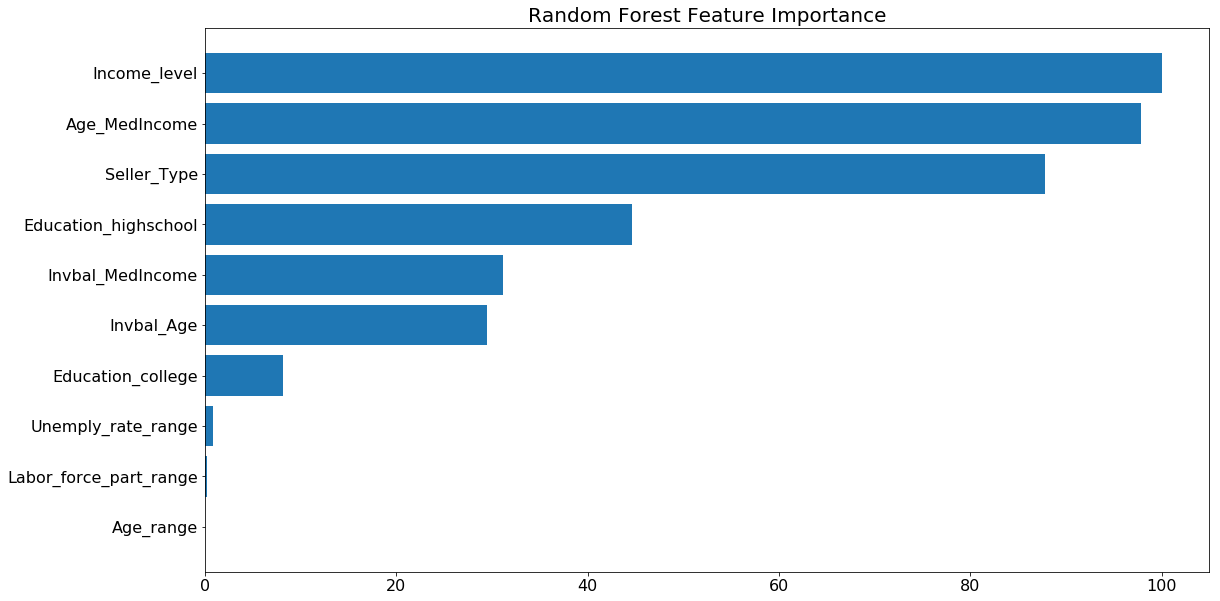

In [40]:
plt.figure(figsize=(18,10))
plt.barh(random.features, random.coef)
plt.title('Random Forest Feature Importance', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16);

# SMOTE - Part 2

In [41]:
forest = RandomForestClassifier(max_features=0.33, n_estimators=200, random_state=123)
forest.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.33, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [42]:
print('Random Forrest Classifier:')
print(classification_report(y_test, forest.predict(X_test)))
print('---------------------------------------------------------')

Random Forrest Classifier:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14053
           1       0.13      0.05      0.07       947

   micro avg       0.92      0.92      0.92     15000
   macro avg       0.53      0.51      0.51     15000
weighted avg       0.89      0.92      0.90     15000

---------------------------------------------------------
